## Kaggle Competition for House Prices: Advanced Regression Techniques 

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

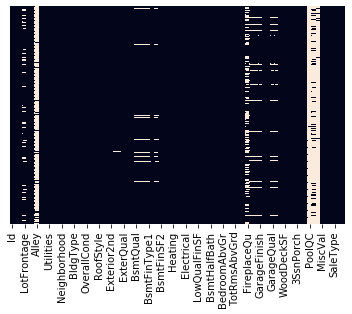

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
df.drop(['Alley'],axis=1,inplace=True)

In [10]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [11]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [12]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [13]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [15]:
df.shape

(1460, 76)

In [16]:
df.drop(['Id'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [18]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

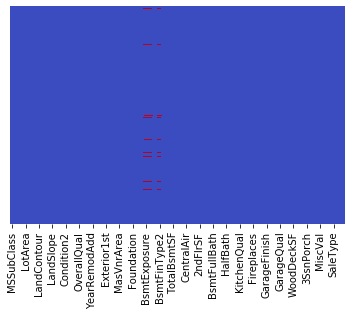

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [20]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

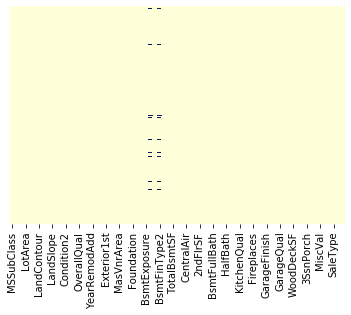

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [22]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(1422, 75)

In [25]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [26]:
##HAndle Categorical Features

In [27]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [28]:
len(columns)

39

In [29]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [30]:
main_df=df.copy()

In [31]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [32]:
test_df.shape

(1459, 74)

In [33]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [34]:
final_df=pd.concat([df,test_df],axis=0)

In [35]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [36]:
final_df.shape

(2881, 75)

In [37]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [38]:
final_df.shape

(2881, 235)

In [39]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [40]:
final_df.shape

(2881, 175)

In [41]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [42]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [43]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [44]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [45]:
df_Train.shape

(1422, 175)

In [46]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\software\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']


## Prediciton and selecting the Algorithm

In [48]:
import xgboost
classifier=xgboost.XGBRegressor()

In [49]:
import xgboost
regressor=xgboost.XGBRegressor()

In [50]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [51]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [53]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   22.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  6.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  8.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbt

In [54]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [55]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [56]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=1, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [57]:
regressor.fit(X_train,y_train)

[14:57:29] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\objective\regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[14:57:29] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:57:34] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\objective\regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=1, monotone_constraints='()',
             n_estimators=900, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [59]:
#df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [60]:
df_Test.shape

(1459, 174)

In [61]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [62]:
#df_Test.drop(['SalePrice'],axis=1).head()

In [63]:
y_pred=regressor.predict(df_Test)

In [64]:
y_pred

array([118058.08 , 165267.73 , 187497.1  , ..., 171507.17 , 118317.195,
       238065.3  ], dtype=float32)

## Step2

In [ ]:
pred.columns=['SalePrice']

In [ ]:
temp_df=df_Train['SalePrice'].copy()

In [ ]:
temp_df.column=['SalePrice']

In [ ]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [ ]:
df_Test.head()

In [ ]:
df_Test=pd.concat([df_Test,pred],axis=1)

In [ ]:
df_Train=pd.concat([df_Train,df_Test],axis=0)

In [ ]:
df_Train.shape

In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

## Artificial Neural Network Implementation

In [76]:
# Importing the Keras libraries and packages
!pip install tensorflow==2.3
from tensorflow import keras
# import keras

from keras.models import Sequential
# from keras.losses import root_mean_squared_error
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 174))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=174, units=50, kernel_initializer="he_uniform")`
C:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
C:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
C:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`


Train on 1137 samples, validate on 285 samples
Epoch 1/1000
1137/1137 [==============================] - 1s 611us/step - loss: 177418.3680 - val_loss: 121989.4123
Epoch 2/1000
1137/1137 [==============================] - 0s 219us/step - loss: 84035.1555 - val_loss: 70351.2575
Epoch 3/1000
1137/1137 [==============================] - 0s 232us/step - loss: 71144.1364 - val_loss: 67102.5769
Epoch 4/1000
1137/1137 [==============================] - 0s 207us/step - loss: 68096.3469 - val_loss: 64111.8514
Epoch 5/1000
1137/1137 [==============================] - 0s 213us/step - loss: 63298.9904 - val_loss: 61517.6012
Epoch 6/1000
1137/1137 [==============================] - 0s 217us/step - loss: 60140.9678 - val_loss: 59006.9060
Epoch 7/1000
1137/1137 [==============================] - 0s 227us/step - loss: 56838.3076 - val_loss: 56273.8629
Epoch 8/1000
1137/1137 [==============================] - 0s 207us/step - loss: 53086.1742 - val_loss: 53920.2381
Epoch 9/1000
1137/1137 [===============

Epoch 72/1000
1137/1137 [==============================] - 0s 221us/step - loss: 33663.0366 - val_loss: 44902.2150
Epoch 73/1000
1137/1137 [==============================] - 0s 201us/step - loss: 33914.3956 - val_loss: 44161.4383
Epoch 74/1000
1137/1137 [==============================] - 0s 208us/step - loss: 34276.1567 - val_loss: 45404.7363
Epoch 75/1000
1137/1137 [==============================] - 0s 267us/step - loss: 34200.5483 - val_loss: 45253.6887
Epoch 76/1000
1137/1137 [==============================] - 0s 281us/step - loss: 33941.7053 - val_loss: 46139.0626
Epoch 77/1000
1137/1137 [==============================] - 0s 275us/step - loss: 34445.9526 - val_loss: 43845.5944
Epoch 78/1000
1137/1137 [==============================] - 0s 290us/step - loss: 34185.1589 - val_loss: 44053.9677
Epoch 79/1000
1137/1137 [==============================] - 0s 351us/step - loss: 34061.7994 - val_loss: 43982.8414
Epoch 80/1000
1137/1137 [==============================] - 0s 308us/step - loss:

1137/1137 [==============================] - 0s 210us/step - loss: 32388.3913 - val_loss: 44584.1460
Epoch 143/1000
1137/1137 [==============================] - 0s 204us/step - loss: 31541.8580 - val_loss: 44838.9469
Epoch 144/1000
1137/1137 [==============================] - 0s 218us/step - loss: 31816.3643 - val_loss: 43737.3385
Epoch 145/1000
1137/1137 [==============================] - 0s 218us/step - loss: 31627.0949 - val_loss: 45330.0317
Epoch 146/1000
1137/1137 [==============================] - 0s 198us/step - loss: 31471.7273 - val_loss: 44132.0769
Epoch 147/1000
1137/1137 [==============================] - 0s 207us/step - loss: 31860.4997 - val_loss: 44134.0777
Epoch 148/1000
1137/1137 [==============================] - 0s 236us/step - loss: 31378.6098 - val_loss: 44090.9134
Epoch 149/1000
1137/1137 [==============================] - 0s 245us/step - loss: 31796.3703 - val_loss: 45205.0772
Epoch 150/1000
1137/1137 [==============================] - 0s 219us/step - loss: 31430

Epoch 213/1000
1137/1137 [==============================] - 0s 202us/step - loss: 29363.2872 - val_loss: 43364.5790
Epoch 214/1000
1137/1137 [==============================] - 0s 209us/step - loss: 29888.3523 - val_loss: 45387.5654
Epoch 215/1000
1137/1137 [==============================] - 0s 227us/step - loss: 29099.6052 - val_loss: 44690.3668
Epoch 216/1000
1137/1137 [==============================] - 0s 200us/step - loss: 29296.2619 - val_loss: 43216.1315
Epoch 217/1000
1137/1137 [==============================] - 0s 201us/step - loss: 29346.9765 - val_loss: 43492.4468
Epoch 218/1000
1137/1137 [==============================] - 0s 207us/step - loss: 29305.4935 - val_loss: 43960.2038
Epoch 219/1000
1137/1137 [==============================] - 0s 227us/step - loss: 29056.8104 - val_loss: 43754.2601
Epoch 220/1000
1137/1137 [==============================] - 0s 200us/step - loss: 29121.0675 - val_loss: 43526.1986
Epoch 221/1000
1137/1137 [==============================] - 0s 217us/ste

1137/1137 [==============================] - 0s 242us/step - loss: 26513.3275 - val_loss: 42631.9552
Epoch 284/1000
1137/1137 [==============================] - 0s 199us/step - loss: 26652.1528 - val_loss: 43162.9870
Epoch 285/1000
1137/1137 [==============================] - 0s 222us/step - loss: 26425.2044 - val_loss: 43057.8358
Epoch 286/1000
1137/1137 [==============================] - 0s 223us/step - loss: 25915.9858 - val_loss: 42327.3200
Epoch 287/1000
1137/1137 [==============================] - 0s 218us/step - loss: 26993.1554 - val_loss: 41838.0813
Epoch 288/1000
1137/1137 [==============================] - 0s 203us/step - loss: 26433.9918 - val_loss: 44662.6920
Epoch 289/1000
1137/1137 [==============================] - 0s 219us/step - loss: 26682.9518 - val_loss: 42375.8604
Epoch 290/1000
1137/1137 [==============================] - 0s 242us/step - loss: 26242.3336 - val_loss: 43483.4648
Epoch 291/1000
1137/1137 [==============================] - 0s 239us/step - loss: 26802

1137/1137 [==============================] - 0s 235us/step - loss: 24815.8487 - val_loss: 41331.1788
Epoch 354/1000
1137/1137 [==============================] - 0s 206us/step - loss: 24093.6180 - val_loss: 40332.8931
Epoch 355/1000
1137/1137 [==============================] - 0s 212us/step - loss: 23836.9339 - val_loss: 41296.9655
Epoch 356/1000
1137/1137 [==============================] - 0s 200us/step - loss: 24904.5590 - val_loss: 40657.8745
Epoch 357/1000
1137/1137 [==============================] - 0s 219us/step - loss: 24253.4807 - val_loss: 41447.1654
Epoch 358/1000
1137/1137 [==============================] - 0s 209us/step - loss: 24755.5176 - val_loss: 41331.9916
Epoch 359/1000
1137/1137 [==============================] - 0s 209us/step - loss: 24153.1731 - val_loss: 41223.3562
Epoch 360/1000
1137/1137 [==============================] - 0s 205us/step - loss: 24441.9986 - val_loss: 41168.8683
Epoch 361/1000
1137/1137 [==============================] - 0s 226us/step - loss: 23664

Epoch 424/1000
1137/1137 [==============================] - 0s 209us/step - loss: 24350.6904 - val_loss: 38671.4006
Epoch 425/1000
1137/1137 [==============================] - 0s 210us/step - loss: 22755.9551 - val_loss: 38598.8915
Epoch 426/1000
1137/1137 [==============================] - 0s 229us/step - loss: 22667.5170 - val_loss: 39576.6691
Epoch 427/1000
1137/1137 [==============================] - 0s 203us/step - loss: 23025.3145 - val_loss: 40076.0597
Epoch 428/1000
1137/1137 [==============================] - 0s 209us/step - loss: 23361.3234 - val_loss: 40519.9909
Epoch 429/1000
1137/1137 [==============================] - 0s 203us/step - loss: 23425.5131 - val_loss: 40211.2774
Epoch 430/1000
1137/1137 [==============================] - 0s 229us/step - loss: 23220.1304 - val_loss: 39774.4595
Epoch 431/1000
1137/1137 [==============================] - 0s 217us/step - loss: 22867.7916 - val_loss: 39281.8963
Epoch 432/1000
1137/1137 [==============================] - 0s 212us/ste

1137/1137 [==============================] - 0s 203us/step - loss: 22684.0600 - val_loss: 38441.6665
Epoch 495/1000
1137/1137 [==============================] - 0s 203us/step - loss: 22896.0971 - val_loss: 38358.3065
Epoch 496/1000
1137/1137 [==============================] - 0s 229us/step - loss: 22380.5747 - val_loss: 38664.4590
Epoch 497/1000
1137/1137 [==============================] - 0s 213us/step - loss: 21864.1854 - val_loss: 39311.8611
Epoch 498/1000
1137/1137 [==============================] - 0s 220us/step - loss: 22239.7794 - val_loss: 39552.2272
Epoch 499/1000
1137/1137 [==============================] - 0s 230us/step - loss: 22643.0144 - val_loss: 38969.5152
Epoch 500/1000
1137/1137 [==============================] - 0s 245us/step - loss: 23263.1828 - val_loss: 38958.3473
Epoch 501/1000
1137/1137 [==============================] - 0s 218us/step - loss: 22150.9551 - val_loss: 38807.6994
Epoch 502/1000
1137/1137 [==============================] - 0s 257us/step - loss: 22308

Epoch 565/1000
1137/1137 [==============================] - 0s 198us/step - loss: 21076.9510 - val_loss: 39092.1635
Epoch 566/1000
1137/1137 [==============================] - 0s 201us/step - loss: 21354.3702 - val_loss: 37643.5918
Epoch 567/1000
1137/1137 [==============================] - 0s 232us/step - loss: 21423.8054 - val_loss: 36643.4594
Epoch 568/1000
1137/1137 [==============================] - 0s 196us/step - loss: 22071.3691 - val_loss: 37466.7083
Epoch 569/1000
1137/1137 [==============================] - 0s 208us/step - loss: 21319.1630 - val_loss: 37530.3825
Epoch 570/1000
1137/1137 [==============================] - 0s 201us/step - loss: 21419.8343 - val_loss: 37022.5821
Epoch 571/1000
1137/1137 [==============================] - 0s 237us/step - loss: 21414.1770 - val_loss: 36824.0163
Epoch 572/1000
1137/1137 [==============================] - 0s 213us/step - loss: 21321.8758 - val_loss: 38125.9575
Epoch 573/1000
1137/1137 [==============================] - 0s 223us/ste

1137/1137 [==============================] - 0s 240us/step - loss: 20922.8367 - val_loss: 37062.0810
Epoch 636/1000
1137/1137 [==============================] - 0s 242us/step - loss: 21101.6754 - val_loss: 36686.0566
Epoch 637/1000
1137/1137 [==============================] - 0s 240us/step - loss: 20392.5884 - val_loss: 36251.3562
Epoch 638/1000
1137/1137 [==============================] - 0s 251us/step - loss: 20780.9426 - val_loss: 36477.2178
Epoch 639/1000
1137/1137 [==============================] - 0s 235us/step - loss: 20218.2775 - val_loss: 40123.1832
Epoch 640/1000
1137/1137 [==============================] - 0s 231us/step - loss: 20044.2040 - val_loss: 36661.9495
Epoch 641/1000
1137/1137 [==============================] - 0s 214us/step - loss: 20262.7373 - val_loss: 36767.4738
Epoch 642/1000
1137/1137 [==============================] - 0s 216us/step - loss: 21378.8828 - val_loss: 37510.7918
Epoch 643/1000
1137/1137 [==============================] - 0s 235us/step - loss: 19928

1137/1137 [==============================] - 0s 239us/step - loss: 20292.8934 - val_loss: 36052.3339
Epoch 706/1000
1137/1137 [==============================] - 0s 213us/step - loss: 19980.5738 - val_loss: 35985.3942
Epoch 707/1000
1137/1137 [==============================] - 0s 201us/step - loss: 19996.6867 - val_loss: 41067.0541
Epoch 708/1000
1137/1137 [==============================] - 0s 199us/step - loss: 20979.0047 - val_loss: 37958.9605
Epoch 709/1000
1137/1137 [==============================] - 0s 224us/step - loss: 19930.7909 - val_loss: 36085.1259
Epoch 710/1000
1137/1137 [==============================] - 0s 214us/step - loss: 19562.7836 - val_loss: 36685.3367
Epoch 711/1000
1137/1137 [==============================] - 0s 203us/step - loss: 20405.5572 - val_loss: 36954.3071
Epoch 712/1000
1137/1137 [==============================] - 0s 202us/step - loss: 20244.0092 - val_loss: 36949.5941
Epoch 713/1000
1137/1137 [==============================] - 0s 221us/step - loss: 19531

Epoch 776/1000
1137/1137 [==============================] - 0s 204us/step - loss: 19500.4756 - val_loss: 35845.1330
Epoch 777/1000
1137/1137 [==============================] - 0s 282us/step - loss: 19056.8369 - val_loss: 37548.4335
Epoch 778/1000
1137/1137 [==============================] - 0s 288us/step - loss: 19692.3192 - val_loss: 36224.3831
Epoch 779/1000
1137/1137 [==============================] - 0s 300us/step - loss: 18546.9883 - val_loss: 36236.1863
Epoch 780/1000
1137/1137 [==============================] - 0s 309us/step - loss: 19747.4972 - val_loss: 35478.6045
Epoch 781/1000
1137/1137 [==============================] - 0s 302us/step - loss: 20636.7538 - val_loss: 36172.9550
Epoch 782/1000
1137/1137 [==============================] - 0s 296us/step - loss: 19019.2616 - val_loss: 35695.2680
Epoch 783/1000
1137/1137 [==============================] - 0s 298us/step - loss: 19603.8255 - val_loss: 36766.3597
Epoch 784/1000
1137/1137 [==============================] - 0s 303us/ste

1137/1137 [==============================] - 0s 231us/step - loss: 19302.0887 - val_loss: 35842.3832
Epoch 847/1000
1137/1137 [==============================] - 0s 210us/step - loss: 19684.9987 - val_loss: 35825.4535
Epoch 848/1000
1137/1137 [==============================] - 0s 207us/step - loss: 19035.3932 - val_loss: 35991.4042
Epoch 849/1000
1137/1137 [==============================] - 0s 200us/step - loss: 19323.8077 - val_loss: 35833.6809
Epoch 850/1000
1137/1137 [==============================] - 0s 224us/step - loss: 18692.0045 - val_loss: 36285.4366
Epoch 851/1000
1137/1137 [==============================] - 0s 208us/step - loss: 18543.3267 - val_loss: 36804.1605
Epoch 852/1000
1137/1137 [==============================] - 0s 224us/step - loss: 19036.4400 - val_loss: 35438.3426
Epoch 853/1000
1137/1137 [==============================] - 0s 219us/step - loss: 18703.3586 - val_loss: 38333.5625
Epoch 854/1000
1137/1137 [==============================] - 0s 239us/step - loss: 19311

1137/1137 [==============================] - 0s 240us/step - loss: 18854.2044 - val_loss: 36821.4601
Epoch 917/1000
1137/1137 [==============================] - 0s 231us/step - loss: 18606.7037 - val_loss: 35296.3591
Epoch 918/1000
1137/1137 [==============================] - 0s 219us/step - loss: 18115.2740 - val_loss: 37859.4544
Epoch 919/1000
1137/1137 [==============================] - 0s 257us/step - loss: 18567.7329 - val_loss: 36173.2294
Epoch 920/1000
1137/1137 [==============================] - 0s 239us/step - loss: 18222.9346 - val_loss: 39100.4563
Epoch 921/1000
1137/1137 [==============================] - 0s 224us/step - loss: 18672.4265 - val_loss: 35812.3035
Epoch 922/1000
1137/1137 [==============================] - 0s 223us/step - loss: 18182.2038 - val_loss: 36693.0408
Epoch 923/1000
1137/1137 [==============================] - 0s 264us/step - loss: 18858.6153 - val_loss: 35446.6122
Epoch 924/1000
1137/1137 [==============================] - 0s 231us/step - loss: 18317

1137/1137 [==============================] - 0s 216us/step - loss: 18052.4887 - val_loss: 37653.4920
Epoch 987/1000
1137/1137 [==============================] - 0s 198us/step - loss: 18290.0633 - val_loss: 36248.7903
Epoch 988/1000
1137/1137 [==============================] - 0s 205us/step - loss: 18024.8586 - val_loss: 35971.5807
Epoch 989/1000
1137/1137 [==============================] - 0s 206us/step - loss: 17760.1592 - val_loss: 36161.8611
Epoch 990/1000
1137/1137 [==============================] - 0s 228us/step - loss: 18349.5705 - val_loss: 38150.7006
Epoch 991/1000
1137/1137 [==============================] - 0s 197us/step - loss: 17711.8844 - val_loss: 35647.4422
Epoch 992/1000
1137/1137 [==============================] - 0s 200us/step - loss: 17800.9993 - val_loss: 35753.6353
Epoch 993/1000
1137/1137 [==============================] - 0s 206us/step - loss: 18579.0931 - val_loss: 35515.5880
Epoch 994/1000
1137/1137 [==============================] - 0s 223us/step - loss: 17703

In [77]:
# ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)
ann_pred=classifier.predict(df_Test.values)

In [78]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [79]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)